# Assessing embryo ploidy levels through seed characteristics

## Modules and functions required for analysis

In [37]:
# Module needed to hide "future warning."
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [38]:
# Function used to plot k-nearest neighbors model.
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

## Importing and viewing data

In [2]:
# pandas needed to import data as dataframe
import pandas as pd

In [62]:
# The "read_csv" function will need to be changed to reflect the file path on personal machine.
seed_data = pd.read_csv("/Users/NathanChristopherJames/seed_classifier/MachineLearning_data.txt", delim_whitespace=True)

seed_data.head() # Viewing structure of dataframe
# "Mean_seed_weight" is in µg and "Mean_percent_shriveled_seeds" is a percentage of shriveled seeds in seed pod.
# "Embryo_ploidy" is either an integer of 2 or 3 representing a diploid or triploid individual, respectively.

,Mean_seed_weight,Mean_percent_shriveled_seeds,Embryo_ploidy
0,23,0,2
1,23,2,2
2,22,1,2
3,24,1,2
4,24,2,2


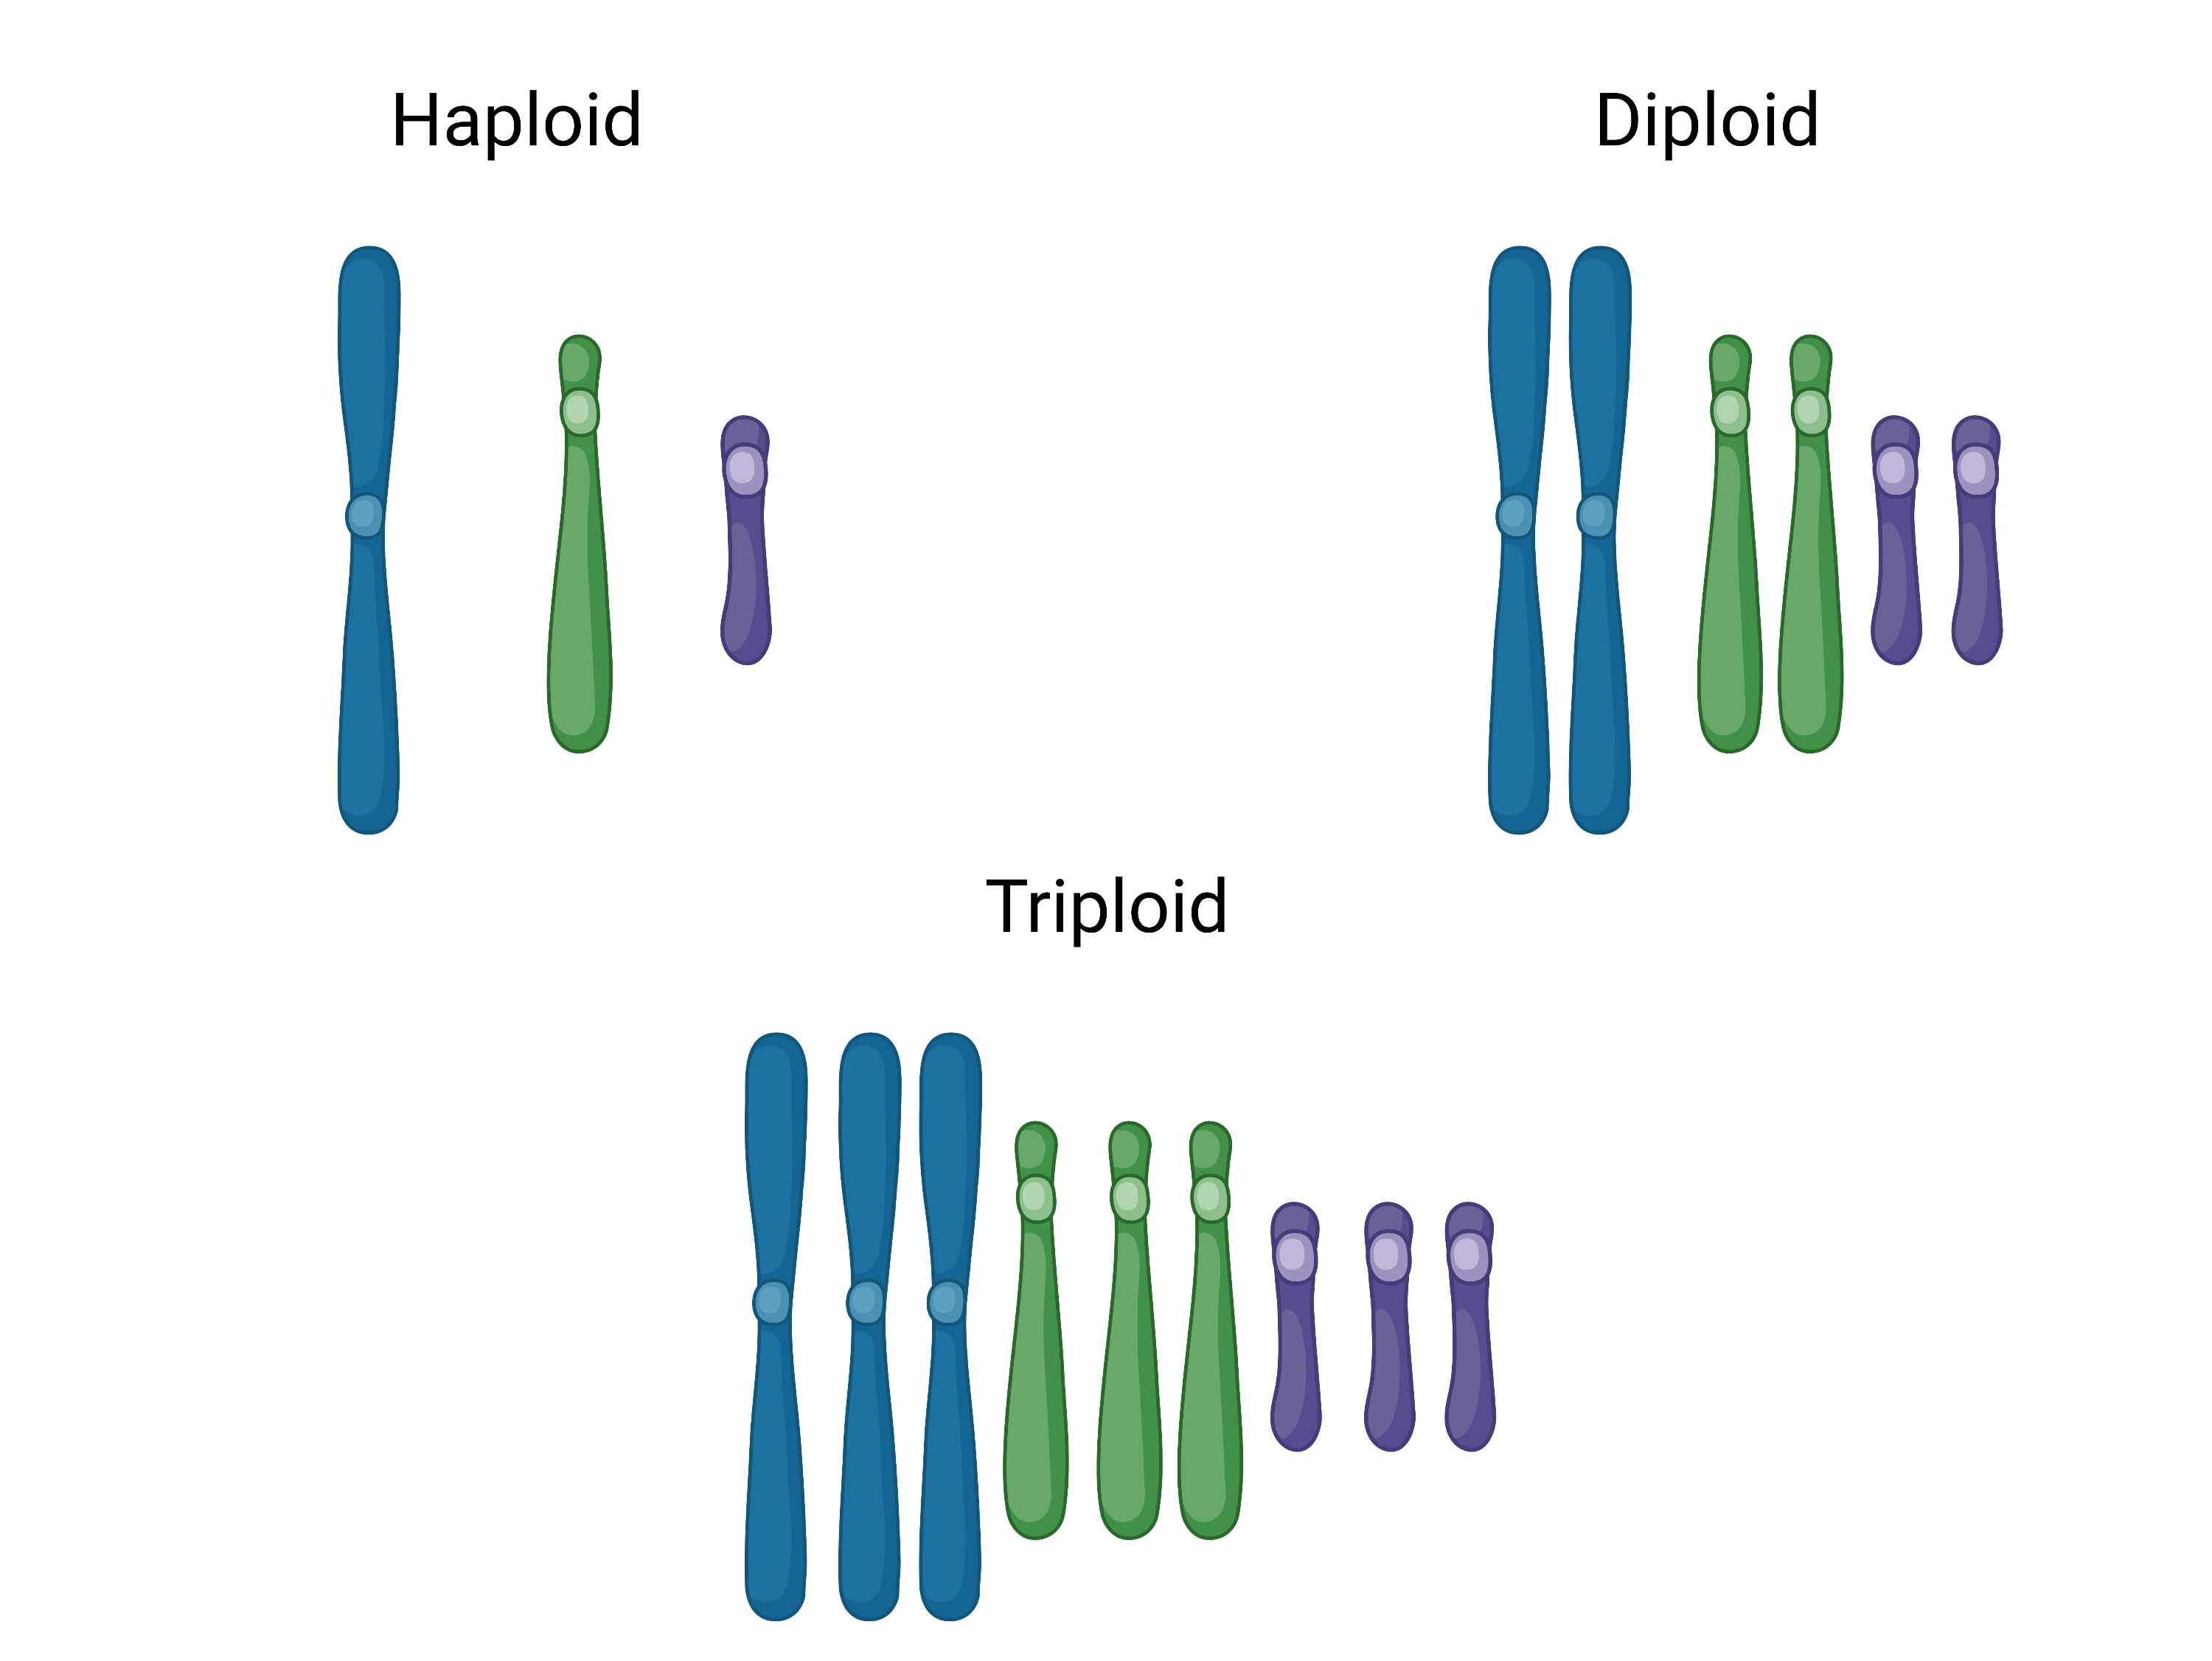
### Figure 1. Example of three different ploidy levels.

## Splitting data into its modeling components

<AxesSubplot:xlabel='Mean seed weights (µg)', ylabel='Mean percent shriveled seeds'>

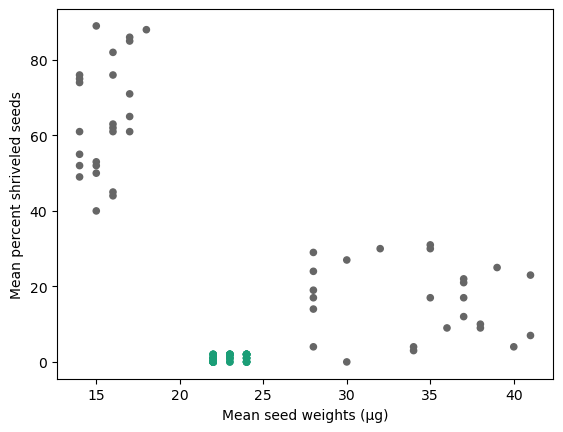

In [65]:
# Split data into X and y
X = seed_data[["Mean_seed_weight", "Mean_percent_shriveled_seeds"]]
y = seed_data["Embryo_ploidy"]

# Scatter plot to get a visual feel for data
X.plot.scatter("Mean_seed_weight", "Mean_percent_shriveled_seeds", c=y, colormap="Dark2", colorbar=False, xlabel="Mean seed weights (µg)", ylabel="Mean percent shriveled seeds")

## Creating k-nearest neighbors model

In [66]:
# Import function to split data into training set and test set
from sklearn.model_selection import train_test_split

# Create training data set and test data set
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [67]:
# Import k-nearest neighbors model function
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model with n_neighbors hyperparameter set to 5
model = KNeighborsClassifier(n_neighbors=5)
# Fit the model to the training data set
model.fit(train_X, train_y)

KNeighborsClassifier()

In [68]:
# Score the model for accuracy
model.score(test_X, test_y) 

1.0

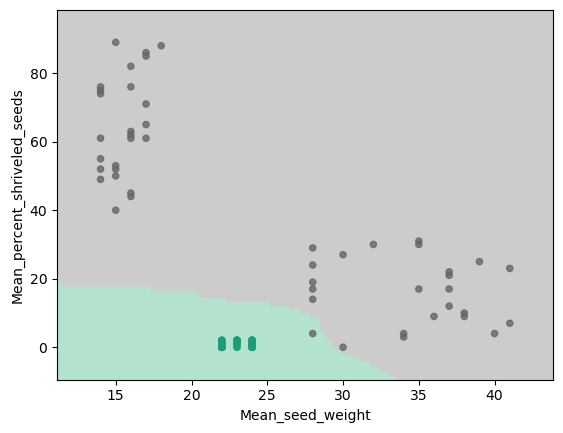

In [71]:
# Finally, plot the model to visualize results
plot_knn(model, X, y) 

## Finetuning n_neighbors hyperparameter

In [72]:
# Import function for grid search cross validation of n_neighbors
from sklearn.model_selection import GridSearchCV

# Create dictionary of n_neighbors to test
parameters = {
    "n_neighbors" : range(1, 51),
}

# Instantiate new model with range of parameters
model = GridSearchCV(KNeighborsClassifier(), parameters)
# Fit the model to training data set
model.fit(train_X, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

In [77]:
# Create a dataframe containing results from cross validation
cv_results = pd.DataFrame(model.cv_results_)
# View top 5 results
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001637,0.000682,0.001969,0.000702,1,{'n_neighbors': 1},1.000000,0.933333,1.0,1.0,1.0,0.986667,0.026667,1
1,0.000999,0.000195,0.001233,0.000206,2,{'n_neighbors': 2},1.000000,0.933333,1.0,1.0,1.0,0.986667,0.026667,1
2,0.000816,0.000060,0.001188,0.000102,3,{'n_neighbors': 3},1.000000,0.933333,1.0,1.0,1.0,0.986667,0.026667,1
3,0.000866,0.000035,0.001132,0.000037,4,{'n_neighbors': 4},0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000773,0.000021,0.001050,0.000036,5,{'n_neighbors': 5},0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

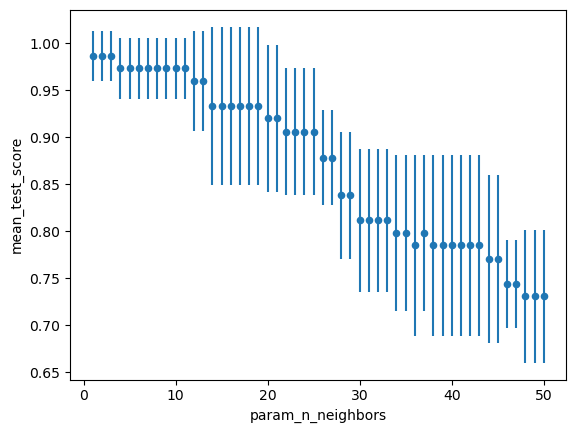

In [78]:
# Plot the results to view best performing n_neighbors hyperparameter
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

In [74]:
# Rescore model with new hyperparameter
model.score(test_X, test_y)

1.0

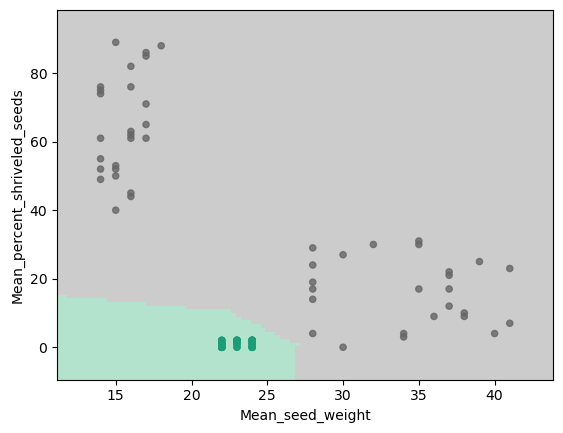

In [75]:
# Replot model with new hyperparameter
plot_knn(model, X, y) 

In [156]:
import pandas as pd
OD_prol = pd.DataFrame(wine_features, columns=["od280/od315_of_diluted_wines", "proline"])
OD_prol

,od280/od315_of_diluted_wines,proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0
...,...,...
173,1.74,740.0
174,1.56,750.0
175,1.56,835.0
176,1.62,840.0


In [157]:
from sklearn.model_selection import train_test_split

train_OD_prol, test_OD_prol, train_y, test_y = train_test_split(OD_prol, wine_cultivator, random_state=42)

In [159]:
from sklearn.neighbors import KNeighborsClassifier

model_3 = KNeighborsClassifier(n_neighbors=5)
model_3.fit(train_OD_prol, train_y)

KNeighborsClassifier()

In [160]:
model_3.score(test_OD_prol, test_y)

0.6888888888888889

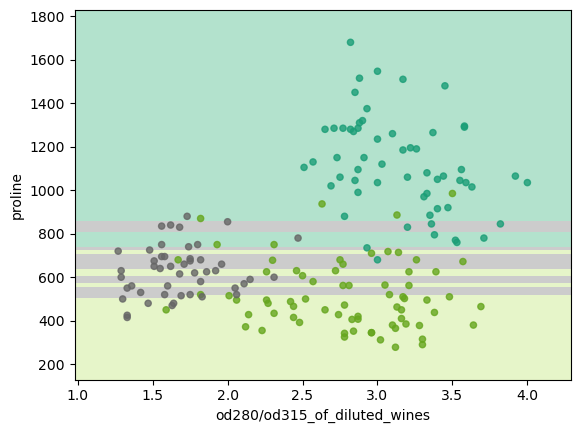

In [161]:
plot_knn(model_3, OD_prol, wine_cultivator)

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 51),
}
model3_CV = GridSearchCV(KNeighborsClassifier(), parameters)
model3_CV.fit(train_OD_prol, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

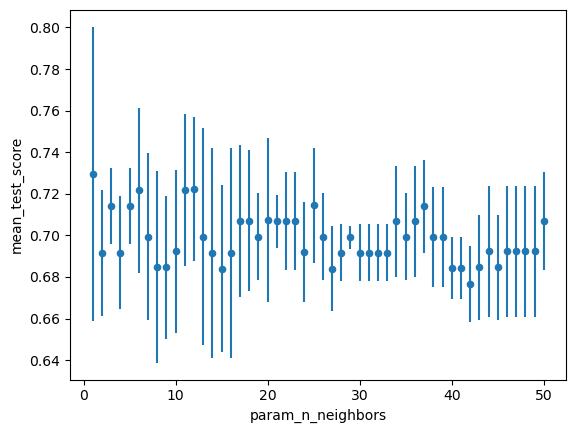

In [163]:
cv_results = pd.DataFrame(model3_CV.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

In [164]:
model3_CV.score(test_OD_prol, test_y)

0.6888888888888889

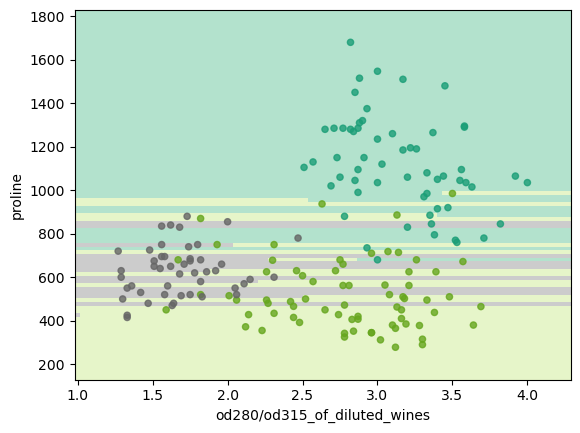

In [165]:
plot_knn(model3_CV, OD_prol, wine_cultivator)